In [50]:
import sys
import os

project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

plt.style.use('ggplot')

%config InlineBackend.figure_formats = ['svg']


from catan.core import Game
from catan.core.models.player import RandomPlayer, Color, Player

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Measure win rates

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.03,  0.02,  0.07,  0.12,  0.17,  0.22,  0.27,  0.32,  0.37,
         0.42,  0.47,  0.52,  0.57,  0.62,  0.67,  0.72,  0.77,  0.82,
         0.87,  0.92,  0.97]),
 <BarContainer object of 20 artists>)

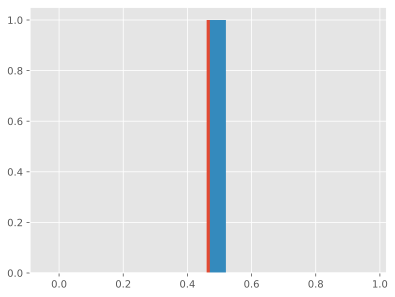

In [3]:

rand_2_players = [
    RandomPlayer(color=Color.BLUE, is_bot=True),
    RandomPlayer(color=Color.RED, is_bot=True)
]

def playout(players):
    game = Game(players=players)
    game.play()
    
    return (game.state.num_turns, game.winning_color())


def win_rate(expected_winner_color, players, n_playouts):
    wins = 0
    
    for i in range(n_playouts):
        _, winner_color = playout(players)
        if winner_color == expected_winner_color:
            wins += 1
            
    return wins / n_playouts

def players_benchmark(players, n_playouts = 100, plt = True):
    pass




plt.hist(
    win_rate(Color.RED, rand_2_players, 100), 
    bins=20)
plt.hist(
    win_rate(Color.BLUE, rand_2_players, 100), 
    bins=20)


In [4]:
# def n_playout_steps(players, n_playouts):
#     return [playout(players)[0] for _ in range(n_playouts)]

# fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, layout='constrained')

# ax0.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE), 
#     ], 300),
#     alpha=0.8,
#     bins=30,
# )
# ax0.set_title("1 random player")

# ax1.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE),
#         RandomPlayer(color=Color.RED),
#     ], 300),
#     alpha=0.8,
#     bins=30
# )
# ax1.set_title("2 random players")

# ax2.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE),
#         RandomPlayer(color=Color.RED),
#         RandomPlayer(color=Color.ORANGE),
#     ], 300),
#     alpha=0.8,
#     bins=30
# )
# ax2.set_title("3 random players")

# ax3.hist(
#     x=n_playout_steps([
#         RandomPlayer(color=Color.BLUE),
#         RandomPlayer(color=Color.RED),
#         RandomPlayer(color=Color.ORANGE),
#         RandomPlayer(color=Color.WHITE),
#     ], 300),
#     alpha=0.8,
#     bins=30
# )
# ax3.set_title("4 random players")

# plt.show()

### MCTS scheme

TODO
- Prune building settlements from initial steps, pick only the most promising ones